## Importing Required Libraries

In this step, we import essential libraries for:
- **Data Handling** (`data_utils`)
- **Data Visualization** (`matplotlib`, `seaborn`)
- **Loading and Processing Audio Data** (`load_metadata`, `load_wave_data`, etc.)


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from data_utils import load_metadata, sample_sounds_by_category, load_wave_data, load_all_sounds,load_paths_from_config
from plot_utils import visualize_category_sounds

## Loading Metadata and File Paths

- The function `load_paths_from_config()` retrieves the paths for the CSV metadata file and the directory containing audio files.
- The function `load_metadata(csv_file_path)` loads the metadata into a pandas DataFrame for further processing.


In [ ]:
# Retrieve path
csv_file_path, audio_files_path = load_paths_from_config()

# make a df out of csv file
df = load_metadata(csv_file_path)

## Filtering Audio Data by Category

- **Selected Categories:**  
  - **Animals:** Dog, Rooster  
  - **Natural Sounds:** Thunderstorm, Pouring Water  
  - **Human Sounds:** Snoring, Sneezing  
  - **Interior Sounds:** Clock Alarm, Vacuum Cleaner  
  - **Urban Noises:** Siren, Helicopter  

- The `df_filtered` DataFrame now only includes sounds from these selected categories.


In [ ]:
# Define categories
categories = {
        'Animals': ['dog', 'rooster'],
        'Natural soundscapes & water sounds': ['thunderstorm', 'pouring_water'],
        'Human sounds': ['snoring', 'sneezing'],
        'Interior/domestic sounds': ['clock_alarm', 'vacuum_cleaner'],
        'Exterior/urban noises': ['siren', 'helicopter']
    }
# Filter the dataframe to only include selected categories
selected_classes = sum(categories.values(), [])  
df_filtered = df[df['category'].isin(selected_classes)] 

## Selecting and Loading Sample Sounds

- The function `sample_sounds_by_category(df, categories)` selects **a subset of sounds** from each category.
- The function `load_wave_data(sampled_sounds, audio_files_path)` loads the **actual waveform data** for selected sounds.


In [4]:
# Selece sample sound based on category
sampled_sounds = sample_sounds_by_category(df, categories)

 #load_sample sound
wave_list_data_sampled = load_wave_data(sampled_sounds, audio_files_path)



## Visualizing Audio Data

This function:
- Displays **waveforms, spectrograms, and histograms** for each category.
- Helps analyze the frequency and amplitude distribution of different sounds.


Analyzing Animals category...


/Users/minaghaderi/Documents/AML/AML-Soheil-Mina-Amir/plot_utils.py:44: RuntimeWarning: divide by zero encountered in log10
  im = ax.pcolormesh(t, f, 20 * np.log10(Sxx), shading='gouraud')  # Convert to dB scale


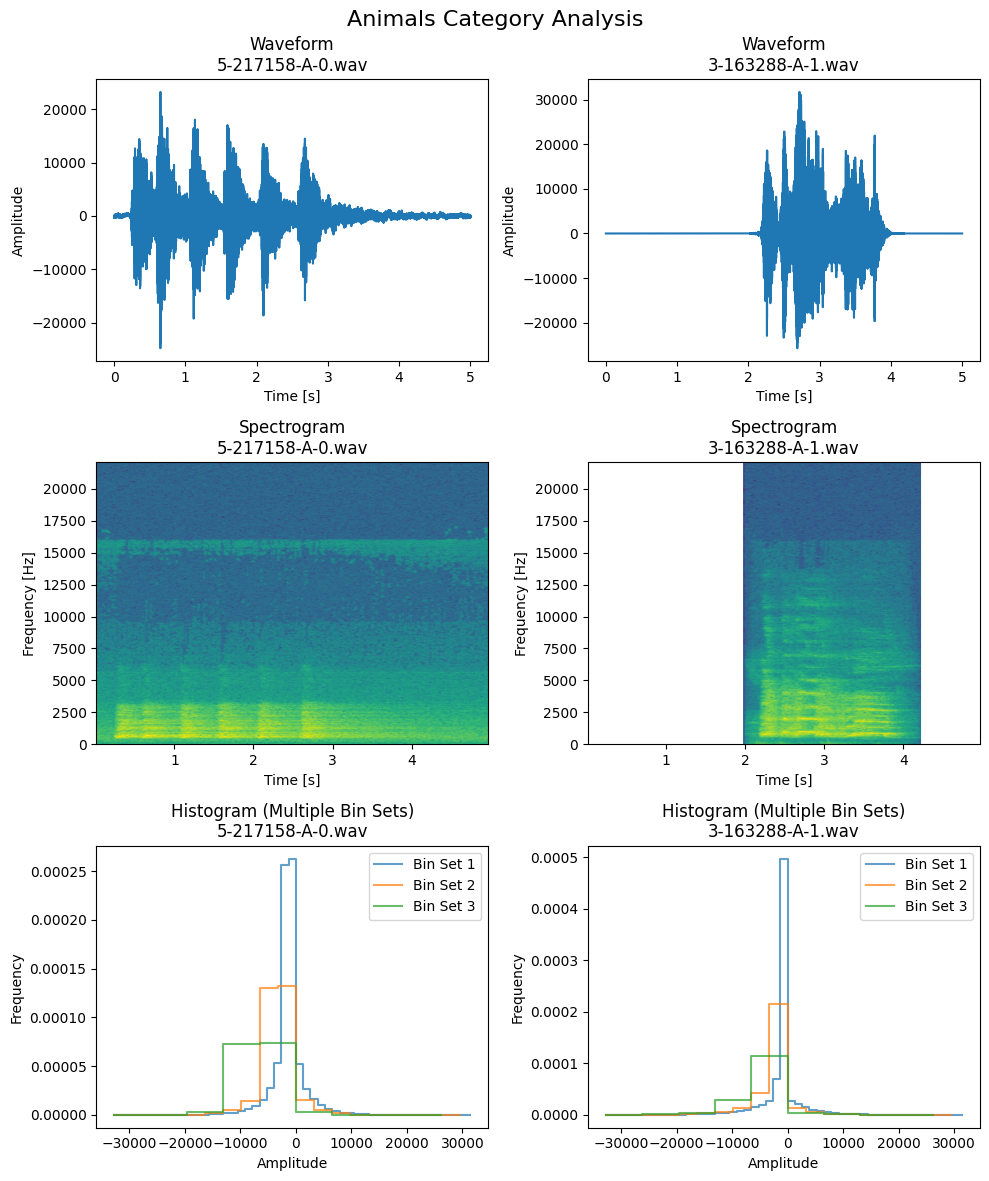

Analyzing Natural soundscapes & water sounds category...


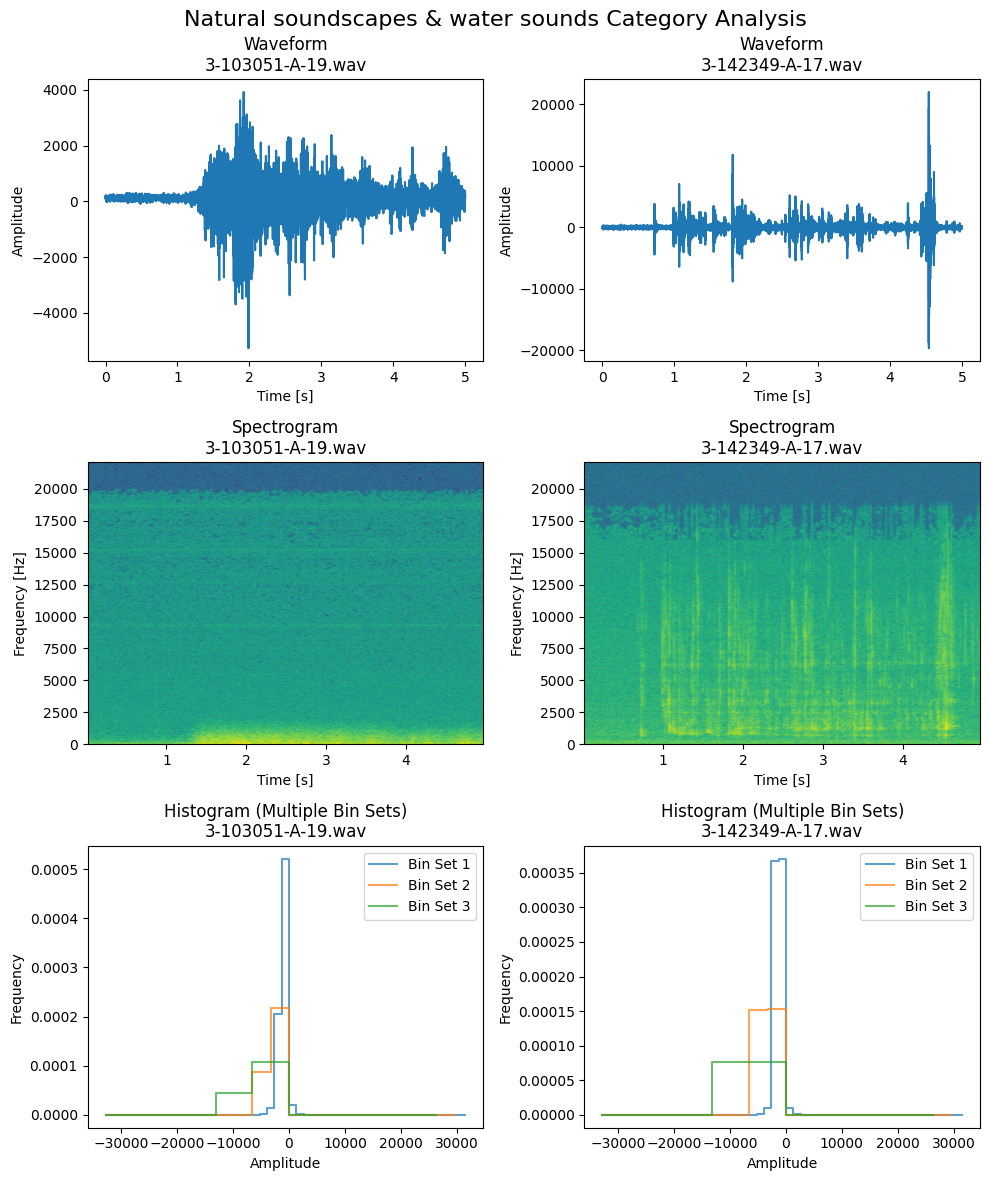

Analyzing Human sounds category...


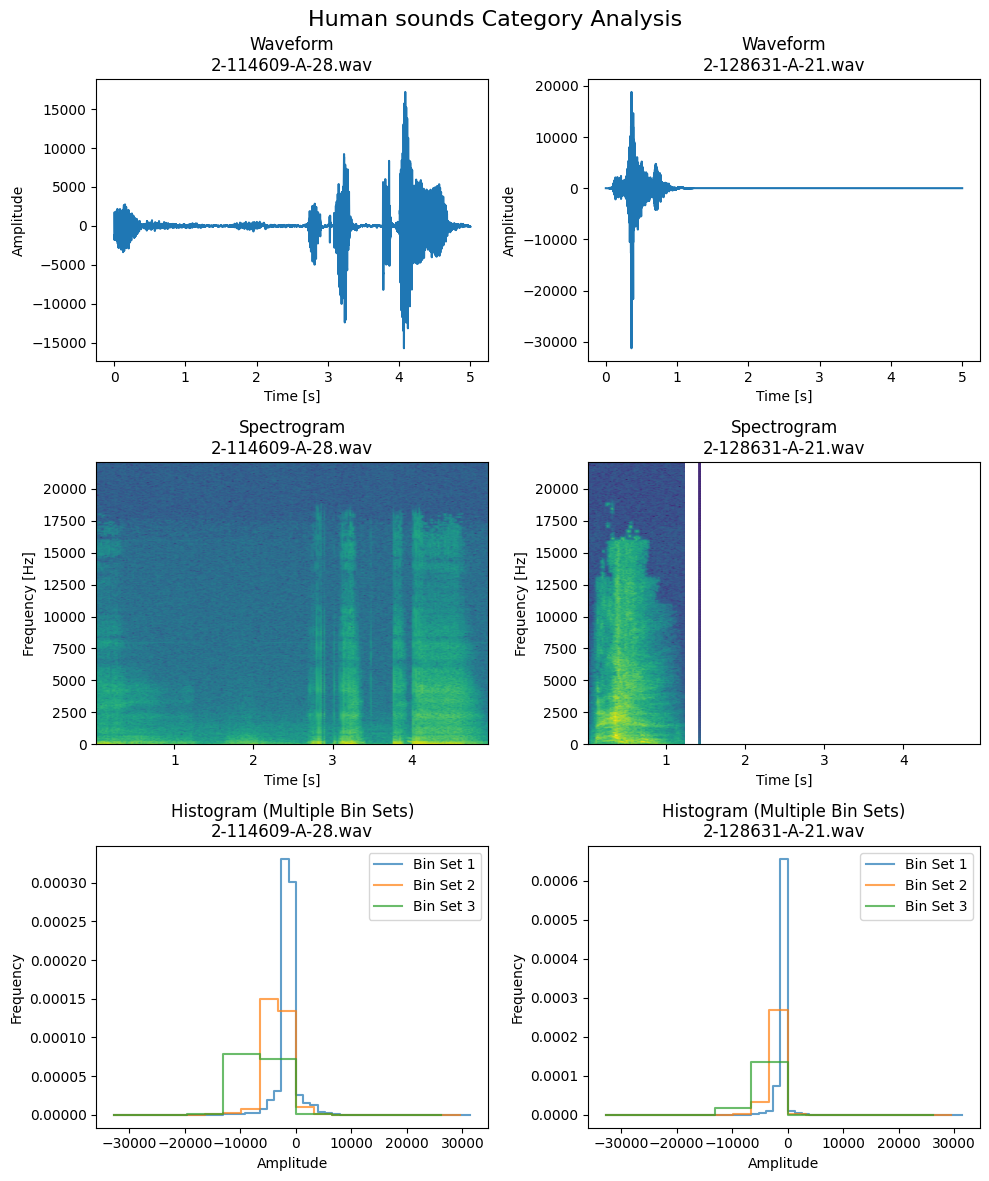

Analyzing Interior/domestic sounds category...


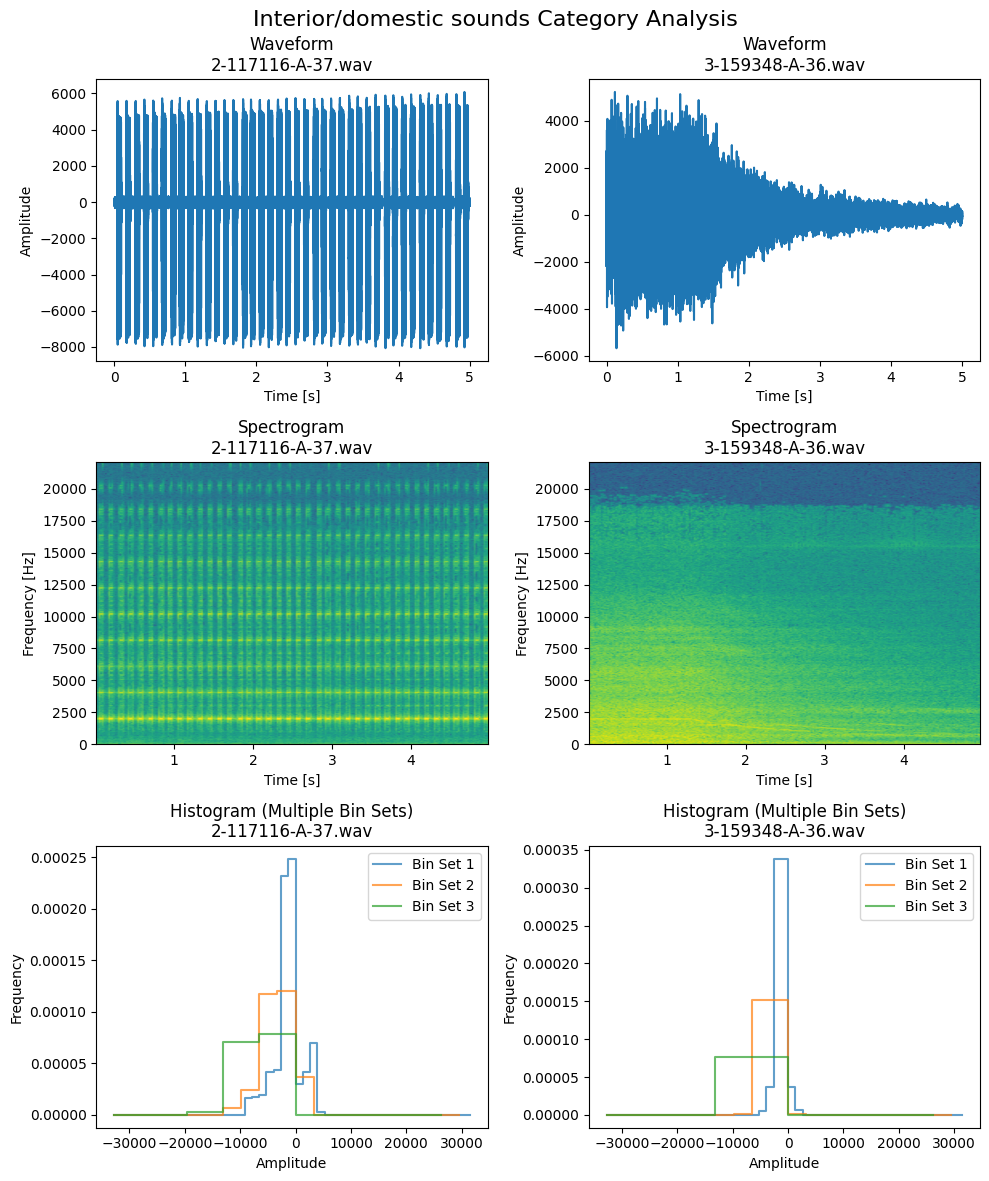

Analyzing Exterior/urban noises category...


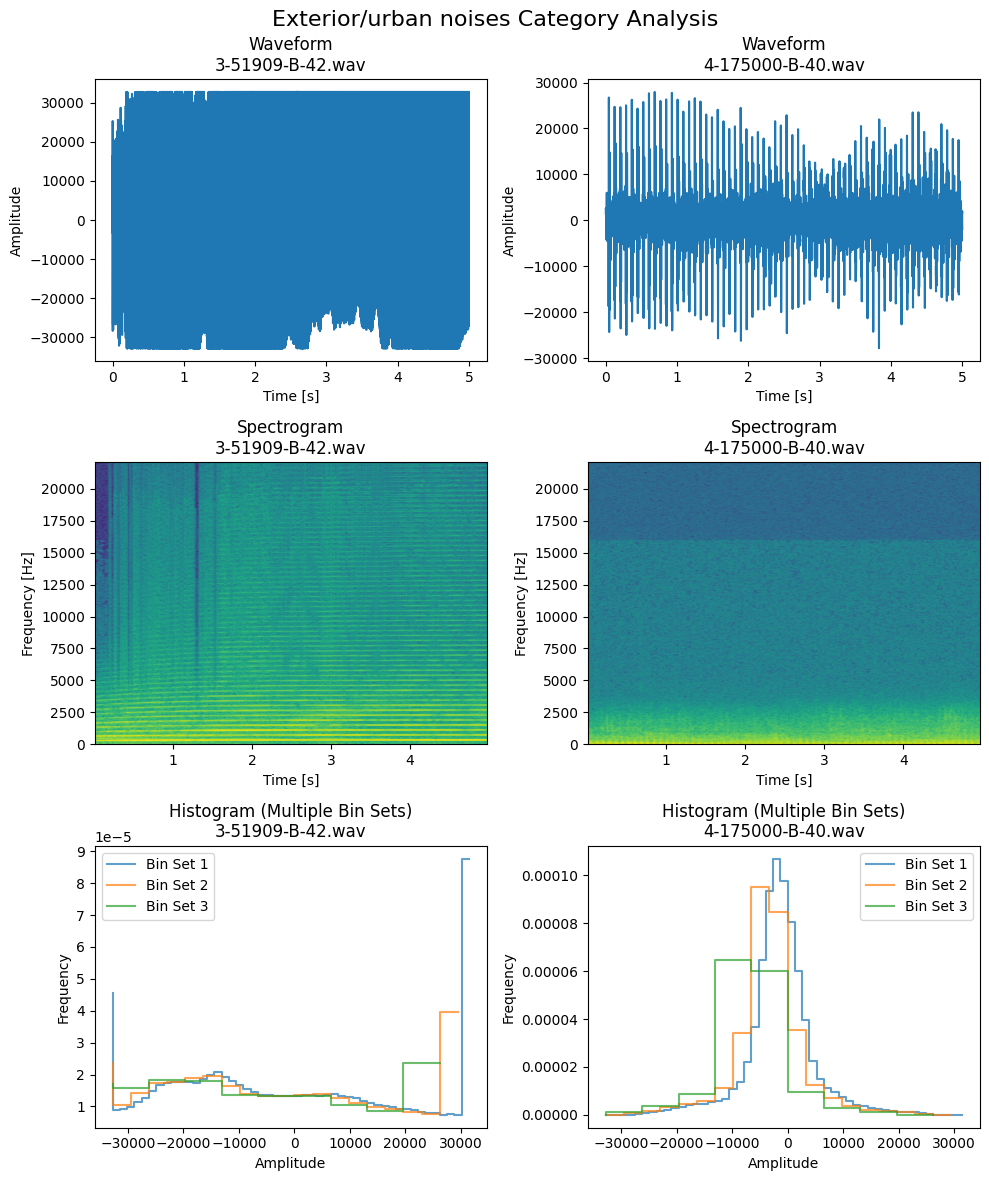

{'Animals': [{'bins_set_1': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 1.73004783e-08, 3.46009567e-09,
          6.92019134e-09, 3.46009567e-09, 2.42206697e-08, 7.61221047e-08,
          1.41863922e-07, 2.90648036e-07, 5.70915785e-07, 1.00688784e-06,
          1.65738583e-06, 2.45320783e-06, 4.25937777e-06, 6.13128952e-06,
          9.47720204e-06, 1.55358296e-05, 2.73312957e-05, 5.36868444e-05,
          2.55773732e-04, 2.62818487e-04, 5.26038344e-05, 2.69299246e-05,
          1.58749189e-05, 1.00308173e-05, 6.48421928e-06, 3.84070619e-06,
          2.43936745e-06, 1.61240458e-06, 8.09662386e-07, 5.01713872e-07,
          2.62967271e-07, 1.83385070e-07, 4.15211480e-08, 1.73004783e-08,
          1.38403827e-08, 1.38403827e-08, 2.42206697e-08, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00]),
   'bins_set_2': array([0.00000000e+00, 0.0

In [5]:
# Visualize
visualize_category_sounds(wave_list_data_sampled)



## Observations from Visualizations

### Waveforms
- Each waveform represents the **amplitude variation** of the sound over time.
- **Animal sounds (dog, rooster)** have **sharp peaks** (indicating bursts of sound).
- **Water sounds (pouring water, thunderstorm)** have a more **continuous** structure.

### Spectrograms
- Spectrograms visualize how **frequencies change over time**.
- **Water sounds (pouring water, thunderstorm)** have **wider frequency ranges**.
- **Human sounds (snoring, sneezing)** show **distinct frequency bands**.
- **Interior sounds (vacuum cleaner, clock alarm)** have **constant-frequency tones**.

### Histograms
- Histograms represent the **distribution of amplitude values**.
- **Thunderstorm and siren sounds** have a **broad distribution** (many different amplitude levels).
- **Vacuum cleaner and clock alarm sounds** have **narrower distributions** (indicating steady sounds).


### Result

1. **Animal sounds** are more **impulsive** and **high-frequency**, while **water sounds** are more **spread out over time**.
2. **Human sounds** have distinct peaks in specific frequency ranges, showing that they are structured.
3. **Interior sounds** tend to be **steady and periodic**, making them easier to separate using frequency-based methods.
4. **Urban noises** often have **wide frequency ranges**, making them more challenging to classify.

